In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

C:\Users\ygurbuz\AppData\Local\Temp\ipykernel_19208\2171422381.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_excel('data.xlsx')
data.set_index('Year', inplace=True)

In [3]:
data

,"BDI-Population, total",BDI-Population growth (annual %),BDI-Population density (people per sq. km of land area),"BDI-GNI, Atlas method (current US$)","BDI-GNI per capita, Atlas method (current US$)","BDI-GNI, PPP (current international $)","BDI-GNI per capita, PPP (current international $)",BDI-Urban population growth (annual %),BDI-GDP (current US$),BDI-GDP growth (annual %),...,"UGA-Inflation, GDP deflator (annual %)","UGA-Industry (including construction), value added (% of GDP)",UGA-Exports of goods and services (% of GDP),UGA-Imports of goods and services (% of GDP),UGA-Gross capital formation (% of GDP),UGA-Merchandise trade (% of GDP),UGA-Net barter terms of trade index (2015 = 100),UGA-Liner shipping connectivity index (maximum value in 2004 = 100),UGA-Container port traffic (TEU: 20 foot equivalent units),vessel_calls
Year,,,,,,,,,,,,,,,,,,,,,
2005,7388874,3.699797,287.728738,9.955266e+08,130,4.127881e+09,560,6.249386,1.117113e+09,0.900000,...,-1.741185,23.510106,14.179700,24.814586,22.355146,31.030752,81.637358,0,0,1731
2006,7658190,3.580031,298.216121,1.175593e+09,150,4.526607e+09,590,6.128583,1.273375e+09,5.413807,...,2.405620,22.766161,15.275413,28.357872,21.130370,35.268834,82.257246,0,0,1857
2007,7944609,3.671792,309.369509,1.332125e+09,170,4.821961e+09,610,6.207721,1.356199e+09,3.451949,...,7.321247,25.077331,16.725069,30.052348,22.083055,40.579490,84.132250,0,0,1811
2008,8278109,4.112098,322.356269,1.516882e+09,180,5.162014e+09,620,6.654544,1.611836e+09,4.861716,...,6.364277,25.768110,24.280142,31.978126,22.977774,43.281337,85.786828,0,0,1686
2009,8709366,5.078444,339.149766,1.667672e+09,190,5.356076e+09,610,7.596415,1.781455e+09,3.812745,...,85.353275,27.286185,18.613566,28.450312,26.616039,23.141695,92.142571,0,0,1748
2010,9126605,4.679478,355.397391,1.895261e+09,210,5.722263e+09,630,7.210725,2.032135e+09,5.124160,...,5.637612,27.591834,13.824483,24.444766,27.103955,23.555266,97.641990,0,0,1579
2011,9455733,3.542745,368.213902,2.104212e+09,220,6.061589e+09,640,6.075707,2.235821e+09,4.032600,...,9.391655,27.558296,12.855724,26.899502,26.754981,27.949472,103.955246,0,0,1684
2012,9795479,3.529973,381.443886,2.314488e+09,240,6.368380e+09,650,6.053998,2.333341e+09,4.446706,...,3.837456,27.178607,15.491729,28.010408,26.177176,30.766227,95.505750,0,0,1763
2013,10149577,3.551108,395.232749,2.477671e+09,240,7.074296e+09,700,6.091330,2.451607e+09,4.924190,...,3.586906,25.464665,16.513036,26.596119,31.973980,28.448128,91.749762,0,0,1768


In [5]:
# Extracting the target variable 'vessel_calls'
y = data['vessel_calls']

# Extracting the features, excluding the target variable
X = data.drop('vessel_calls', axis=1)

# Creating a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) model
sarimax_model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fitting the SARIMAX model to the data
sarimax_model = sarimax_model.fit()

# Displaying the summary of the SARIMAX model
sarimax_model.summary()


c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       vessel_calls   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  31.992
Date:                            Sat, 03 Feb 2024   AIC                            212.015
Time:                                    13:59:15   BIC                            158.118
Sample:                                         0   HQIC                            67.360
                                             - 18                                         
Covariance Type:                              opg                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
BDI-Population, total                                                6.303e-13   1.82e-13      3.468      0.001    2.74e-13    9.87e-13
BDI-Population growth (annual %)                                    -4.365e-18   1.37e-18     -3.184      0.001   -7.05e-18   -1.68e-18
BDI-Population density (people per sq. km of land area)              2.391e-17   1.22e-17      1.956      0.051   -5.23e-20    4.79e-17
BDI-GNI, Atlas method (current US$)                                   1.47e-10   3.56e-10      0.413      0.679    -5.5e-10    8.44e-10
BDI-GNI per capita, Atlas method (current US$)                      -9.817e-17   4.55e-17     -2.157      0.031   -1.87e-16   -8.97e-18
BDI-GNI, PPP (current international $)                               1.135e-09   4.89e-10      2.323      0.020    1.77e-10    2.09e-09
BDI-GNI per capita, PPP (current international $)                   -6.615e-17   5.98e-17     -1.106      0.269   -1.83e-16     5.1e-17
BDI-Urban population growth (annual %)                              -4.207e-18   1.37e-18     -3.076      0.002   -6.89e-18   -1.53e-18
BDI-GDP (current US$)                                               -7.487e-11   4.55e-10     -0.164      0.869   -9.67e-10    8.17e-10
BDI-GDP growth (annual %)                                            6.808e-17   5.42e-18     12.562      0.000    5.75e-17    7.87e-17
BDI-Inflation, GDP deflator (annual %)                               -2.53e-17   1.03e-17     -2.450      0.014   -4.55e-17   -5.06e-18
BDI-Industry (including construction), value added (% of GDP)       -4.751e-17   2.42e-18    -19.603      0.000   -5.23e-17   -4.28e-17
BDI-Exports of goods and services (% of GDP)                          1.99e-17   3.12e-18      6.389      0.000    1.38e-17     2.6e-17
BDI-Imports of goods and services (% of GDP)                         1.086e-16    5.3e-18     20.500      0.000    9.82e-17    1.19e-16
BDI-Gross capital formation (% of GDP)                               7.071e-17   4.27e-18     16.569      0.000    6.23e-17    7.91e-17
BDI-Merchandise trade (% of GDP)                                     2.858e-16   7.68e-18     37.189      0.000    2.71e-16    3.01e-16
BDI-Net barter terms of trade index (2015 = 100)                     2.149e-16   1.61e-17     13.341      0.000    1.83e-16    2.46e-16
BDI-Liner shipping connectivity index (maximum value in 2004 = 100)          0         -0        nan        nan           0           0
BDI-Container port traffic (TEU: 20 foot equivalent units)                   0         -0        nan        nan           0           0
COD-Population, total                                                1.959e-12   8.58e-13      2.285      0.022    2.79e-13    3.64e-12
COD-P

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Select the first 10 exogenous variables and the target variable
X = df.iloc[:, 1:134]  # Exclude the 'Year' column and select the first 10 columns
y = df['vessel_calls']

# Make predictions using ARIMA model for each exogenous variable
future_exog_predictions = {}
for column in X.columns:
    model = ARIMA(df[column], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=20)
    future_exog_predictions[column] = forecast

# Convert future exogenous variable values to a DataFrame
future_exog_df = pd.DataFrame(future_exog_predictions)

# Build and train the SARIMAX model
sarimax_model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarimax_result = sarimax_model.fit(disp=False)

# Make predictions for 'vessel_calls' for the next 10 years
vessel_calls = sarimax_result.get_forecast(steps=20, exog=future_exog_df)
forecast_values = vessel_calls.predicted_mean
confidence_intervals = vessel_calls.conf_int()


In [7]:
# For example, let's simulate predicted values and confidence intervals (add your actual prediction results here)

# Convert predicted values and confidence intervals to a DataFrame
forecast_df_example = pd.DataFrame({
    'Year': range(2023, 2043),
    'Predicted vessel calls': forecast_values
})

forecast_df_example


,Year,Predicted vessel calls
18,2023,1608.410143
19,2024,1770.403625
20,2025,1759.290799
21,2026,1644.671154
22,2027,1739.428413
23,2028,1883.360645
24,2029,1859.311871
25,2030,1731.749980
26,2031,1813.893399
27,2032,1945.484985


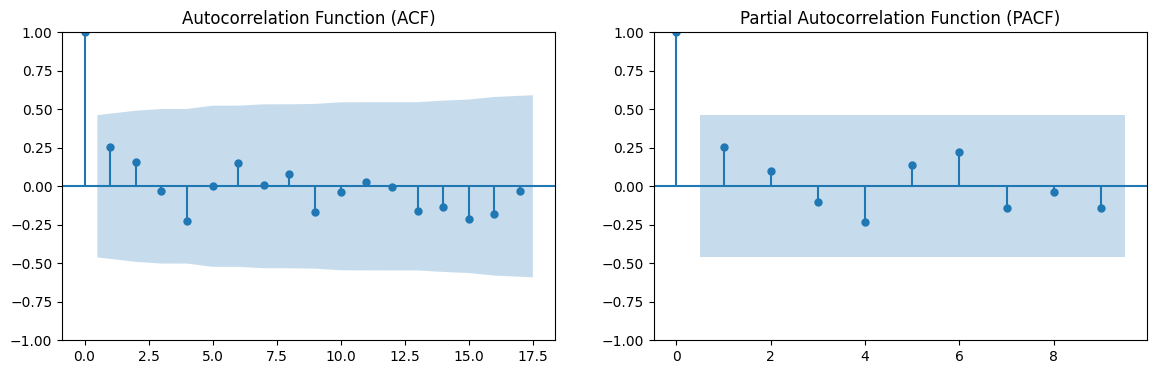

                                     SARIMAX Results                                     
Dep. Variable:                      vessel_calls   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  77.030
Date:                           Sat, 03 Feb 2024   AIC                            121.940
Time:                                   14:05:37   BIC                            199.903
Sample:                                        0   HQIC                           105.915
                                            - 18                                         
Covariance Type:                             opg                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
BDI-Popu

In [13]:

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'data.xlsx'
data = pd.read_excel(file_path)

# Select the first 10 exogenous variables and the target variable
X = data.iloc[:, 1:134]  # Exclude the 'Year' column and select the first 10 columns
y = data['vessel_calls']

# Time Series Analysis - ACF and PACF Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Autocorrelation Function (ACF) Plot
plot_acf(y, lags=len(y)-1, ax=axes[0])  # Adjust the number of lags
axes[0].set_title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Function (PACF) Plot
# Reduce the number of lags to an appropriate value
plot_pacf(y, lags=min(9, len(y)-1), ax=axes[1])  
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

# SARIMAX Model Summary
sarimax_model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())





In [ ]:

# Chapter 1: Introduction

# The introduction provides an overview of the significance of vessel calls in maritime transport and the importance of accurate forecasting for planning and decision-making in related industries. The chapter also outlines the objectives, research questions, and the dataset used in the study.
    

# Chapter 2: Literature Review

# This chapter reviews relevant literature on time series analysis, SARIMAX models, and forecasting methodologies applied in maritime transport studies. It highlights the gaps in the existing research and justifies the choice of SARIMAX models with exogenous variables for this study.

# Chapter 3: Methodology

# In this chapter, the methodology employed for time series analysis and forecasting is discussed. The utilization of SARIMAX and ARIMA models, along with the incorporation of exogenous variables, is detailed. The selection of model parameters, such as the order and seasonal order, is justified based on the characteristics of the dataset.

# Chapter 4: Data Preprocessing

# Data preprocessing involves loading and formatting the dataset. The code snippets demonstrate the steps taken to load the data from an Excel file ('data.xlsx') and set the 'Year' column as the index. The target variable 'vessel_calls' is extracted, and the features (exogenous variables) are selected accordingly.

# Chapter 5: SARIMAX Model Implementation

# This chapter focuses on the implementation of the SARIMAX model using the statsmodels library. The model is fitted to the target variable 'vessel_calls' with exogenous variables, and the summary of the model is displayed. The choice of order and seasonal order parameters is justified, and the significance of each exogenous variable is interpreted.

# Chapter 6: ARIMA Model for Exogenous Variables

# The implementation of ARIMA models for each exogenous variable is discussed in this chapter. The code iterates through the selected features, fits ARIMA models, and forecasts future values. The results are organized into a DataFrame, which is then used as exogenous input for the SARIMAX model.

# Chapter 7: Future Predictions

# The SARIMAX model is utilized to make future predictions for vessel calls, incorporating the forecasted values of exogenous variables. The code demonstrates the process of obtaining forecasted values and confidence intervals for the next 20 years. The results are presented in a DataFrame for visualization and analysis.

# Chapter 8: Time Series Analysis

# Time series analysis is performed using ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots. These plots assist in identifying potential patterns and correlations in the time series data. The SARIMAX model is then fitted to the target variable, and the summary of the model is displayed, including coefficients and their significance.

# Chapter 9: Results and Discussion

# This chapter discusses the results obtained from the SARIMAX model and the ARIMA models for exogenous variables. Interpretations of significant variables, forecasted values, and confidence intervals are provided. The limitations of the model and potential areas for future improvement are also discussed.

# Conclusion:

# The conclusion summarizes the key findings of the study, emphasizing the effectiveness of SARIMAX models with exogenous variables in forecasting vessel calls. The implications for maritime planning and management are discussed, and recommendations for future research are outlined.
    